In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Titanic Dataset

Focus on feature engineering

## 1. Load data and inspect

In [2]:
df = pd.read_csv("data/titanic_dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
titanic = df.copy()

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

- `PassengerId` & `Name` are unique columns
- `Ticket` has very high cardinality

In [8]:
titanic["Ticket"].value_counts().head(20)

CA. 2343        7
1601            7
347082          7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
382652          5
PC 17757        4
113781          4
4133            4
349909          4
LINE            4
17421           4
2666            4
W./C. 6608      4
113760          4
19950           4
347077          4
248727          3
Name: Ticket, dtype: int64

Doesn't seem like we can do anything with this...

## 2. Data Cleaning

In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# check missing values in 'Age'
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
titanic[titanic["Age"].isna()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [12]:
# run regression to model age as a function of sex, Pclass, Fare, Survived
import statsmodels.api as sm

predict_age = titanic[~titanic["Age"].isna()][["Age", "Sex", "Fare", "Survived"]].copy()
predict_age = predict_age.assign(const=1)

# create dummies
predict_age = predict_age.assign(female=predict_age["Sex"].eq("female").astype(int))

# run OLS
lin_reg = sm.OLS(predict_age["Age"],
                 predict_age[["const", "female", "Fare", "Survived"]]).fit()

In [13]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.119
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           0.000412
Time:                        10:11:06   Log-Likelihood:                -2914.2
No. Observations:                 714   AIC:                             5836.
Df Residuals:                     710   BIC:                             5855.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1756      0.763     39.574      0.000      28.679      31.673
female        -2.4160      1.327     -1.820      0.069      -5.022       0.190
Fare           0.0355      0.011      3.358      0.001       0.015       0.056
Survived      -2.0311      1.328     -1.530      0.127      -4.638       0.576
==============================================================================
Omnibus:                       16.882   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.474
Skew:                           0.379   Prob(JB):                     0.000161
Kurtosis:                       3.115   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Use lin reg model to predict age for those that are missing

In [14]:
# create the subset of the dataframe with missing age info
predicted_age = titanic[titanic["Age"].isna()][["Age", "Sex", "Fare", "Survived"]].copy()
predicted_age = predicted_age.assign(const=1)
predicted_age = predicted_age.assign(female=predicted_age["Sex"].eq("female").astype(int))

titanic.loc[titanic["Age"].isna(), "Age"] = lin_reg.predict(predicted_age[["const", "female", "Fare", "Survived"]])

In [15]:
lin_reg.predict(predicted_age[["const", "female", "Fare", "Survived"]]).describe()

count    177.000000
mean      29.642069
std        1.962011
min       25.984965
25%       28.540066
50%       30.432962
75%       30.461362
max       38.252689
dtype: float64

Cool

---

In [16]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# investigate 'Embarked'
titanic[titanic["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both passengers have the same value for cabin. maybe we can find other passengers with the same cabin.

In [18]:
titanic[titanic["Cabin"].eq("B28")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


no

In [19]:
titanic.loc[50:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.000000,0,0,A/4. 39886,7.8000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.000000,1,0,2926,26.0000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,113509,61.9792,B30,C
55,56,1,1,"Woolner, Mr. Hugh",male,29.404722,0,0,19947,35.5000,C52,S
56,57,1,2,"Rugg, Miss. Emily",female,21.000000,0,0,C.A. 31026,10.5000,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.500000,0,0,2697,7.2292,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.000000,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,NaN,S


In [20]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
titanic.loc[titanic["Embarked"].isna(), "Embarked"] = "S"

In [22]:
# check Cabin
titanic["Cabin"].isna().value_counts(normalize=True)

True     0.771044
False    0.228956
Name: Cabin, dtype: float64

In [23]:
titanic["Cabin"].isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [24]:
titanic.loc[~titanic["Cabin"].isna(), "Cabin"].nunique()

147

In [25]:
titanic.loc[~titanic["Cabin"].isna(), "Cabin"].head(20)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
54            B30
55            C52
61            B28
62            C83
66            F33
75          F G73
88    C23 C25 C27
92            E31
96             A5
97        D10 D12
Name: Cabin, dtype: object

In [26]:
# this might be a good candidate to drop
titanic = titanic.drop(columns="Cabin")

In [27]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
titanic.replace("", np.nan).isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
titanic.replace(" ", np.nan).isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dataset is 'clean'. Look at useful columns

In [30]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age            185
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [31]:
# drop ticket as well
titanic = titanic.drop(columns="Ticket")

Convert 'Sex' to 'female' boolean

In [32]:
titanic = titanic.assign(female=titanic["Sex"].eq("female").astype(int))
titanic = titanic.drop(columns="Sex")

In [33]:
titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## 3. Feature Extraction and Engineering

In [34]:
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.592061,1,2,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,C,0


### I. Calculate family size based on `SibSp` and `Parch`

In [35]:
titanic[titanic["SibSp"].eq(0) & titanic["Parch"].eq(0)]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,S,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,S,0
5,6,0,3,"Moran, Mr. James",30.475857,0,0,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,51.8625,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.000000,0,0,26.5500,S,1
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",25.000000,0,0,7.0500,S,0
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,C,0


In [36]:
titanic = titanic.assign(FamilySize=titanic["SibSp"] + titanic["Parch"] + 1)

In [37]:
# Create single traveller boolean
titanic = titanic.assign(SingleTraveller=titanic["FamilySize"].eq(1).astype(int))

### II. Extract useful information from `Name`

In [38]:
titanic["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

Seems like every person used to have a title. If they follow some pattern, maybe we can extract that as a feature

In [39]:
import re

title_pattern = r",\s(.+)\."
titles = titanic["Name"].str.extract(title_pattern)[0]
titles.value_counts()

Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Mlle                          2
Col                           2
Major                         2
Jonkheer                      1
Ms                            1
Capt                          1
Mrs. Martin (Elizabeth L      1
Don                           1
the Countess                  1
Mme                           1
Lady                          1
Sir                           1
Name: 0, dtype: int64

Group all titles that have an occurence of less than 8 into a title 'Other'

In [40]:
titles_to_keep = titles.value_counts()[titles.value_counts().ge(8)].index

In [41]:
titles[~titles.isin(titles_to_keep)] = "Other"

In [42]:
titles.value_counts()

Mr        517
Miss      182
Mrs       124
Master     40
Other      28
Name: 0, dtype: int64

In [43]:
titanic = titanic.assign(Title=titles)

### III. Group `Age`

- Either through binning, or
- through through useful categories (e.g. child/adult)

In [44]:
pd.cut(titanic["Age"], 5).value_counts()

(16.336, 32.252]    517
(32.252, 48.168]    194
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [45]:
pd.cut(titanic["Age"], 5).value_counts().index

CategoricalIndex([(16.336, 32.252], (32.252, 48.168],   (0.34, 16.336],
                  (48.168, 64.084],   (64.084, 80.0]],
                 categories=[(0.34, 16.336], (16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (64.084, 80.0]], ordered=True, dtype='category')

In [46]:
titanic = titanic.assign(AgeGroup=pd.cut(titanic["Age"], 5))

In [47]:
# child/adult: age <= 18, then 'child', else 'adult'
titanic.assign(ChildAdult=pd.cut(titanic["Age"], [0, 18, titanic["Age"].max()])).head(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,FamilySize,SingleTraveller,Title,AgeGroup,ChildAdult
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,S,0,2,0,Mr,"(16.336, 32.252]","(18.0, 80.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,C,1,2,0,Mrs,"(32.252, 48.168]","(18.0, 80.0]"
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,S,1,1,1,Miss,"(16.336, 32.252]","(18.0, 80.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,S,1,2,0,Mrs,"(32.252, 48.168]","(18.0, 80.0]"
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,S,0,1,1,Mr,"(32.252, 48.168]","(18.0, 80.0]"
5,6,0,3,"Moran, Mr. James",30.475857,0,0,8.4583,Q,0,1,1,Mr,"(16.336, 32.252]","(18.0, 80.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,51.8625,S,0,1,1,Mr,"(48.168, 64.084]","(18.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,21.0750,S,0,5,0,Master,"(0.34, 16.336]","(0.0, 18.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,11.1333,S,1,3,0,Mrs,"(16.336, 32.252]","(18.0, 80.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,30.0708,C,1,2,0,Mrs,"(0.34, 16.336]","(0.0, 18.0]"


kinda works, but we want a child boolean

In [48]:
titanic.assign(Child=np.where(titanic["Age"].le(18),1,0))

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,FamilySize,SingleTraveller,Title,AgeGroup,Child
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,S,0,2,0,Mr,"(16.336, 32.252]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,C,1,2,0,Mrs,"(32.252, 48.168]",0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,S,1,1,1,Miss,"(16.336, 32.252]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,S,1,2,0,Mrs,"(32.252, 48.168]",0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,S,0,1,1,Mr,"(32.252, 48.168]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,S,0,1,1,Other,"(16.336, 32.252]",0
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,S,1,1,1,Miss,"(16.336, 32.252]",0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.592061,1,2,23.4500,S,1,4,0,Miss,"(16.336, 32.252]",0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,C,0,1,1,Mr,"(16.336, 32.252]",0


In [49]:
# or even simpler
titanic = titanic.assign(Child=titanic["Age"].le(18).astype(int))

## 4. Preprocessing

In [50]:
titanic.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Embarked             object
female                int64
FamilySize            int64
SingleTraveller       int64
Title                object
AgeGroup           category
Child                 int64
dtype: object

In [51]:
# create dummies
to_dummies = ["Embarked", "Title", "AgeGroup", "Pclass"]
titanic = pd.get_dummies(data=titanic,
                         columns=to_dummies,
                         drop_first=True)

In [52]:
titanic.dtypes

PassengerId                    int64
Survived                       int64
Name                          object
Age                          float64
SibSp                          int64
Parch                          int64
Fare                         float64
female                         int64
FamilySize                     int64
SingleTraveller                int64
Child                          int64
Embarked_Q                     uint8
Embarked_S                     uint8
Title_Miss                     uint8
Title_Mr                       uint8
Title_Mrs                      uint8
Title_Other                    uint8
AgeGroup_(16.336, 32.252]      uint8
AgeGroup_(32.252, 48.168]      uint8
AgeGroup_(48.168, 64.084]      uint8
AgeGroup_(64.084, 80.0]        uint8
Pclass_2                       uint8
Pclass_3                       uint8
dtype: object

### 5. Split dataset

In [53]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic, test_size=.15, random_state=7)

In [54]:
# categorize features
id_col = ["PassengerId"]
target_col = ["Survived"]
num_cols = ["SibSp", "Parch", "Fare", "FamilySize", "Age"]
bool_cols = ["female", "SingleTraveller", "Child"]
dummy_cols = [col for col in titanic.columns for categ in to_dummies if col.startswith(categ)]

In [55]:
train["Survived"].value_counts(normalize=True)

0    0.615588
1    0.384412
Name: Survived, dtype: float64

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

In [57]:
train_X = train[num_cols+bool_cols+dummy_cols]
train_y = train[target_col]
test_X = test[num_cols+bool_cols+dummy_cols]
test_y = test[target_col]

In [76]:
lr = LogisticRegression()
lr.fit(train_X, train_y.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
predictions = lr.predict(test_X)

In [60]:
balanced_accuracy_score(test_y, predictions)

0.7632884479092842

In [61]:
lr.predict_proba(test_X)

array([[0.89528072, 0.10471928],
       [0.81052425, 0.18947575],
       [0.93163598, 0.06836402],
       [0.93046557, 0.06953443],
       [0.0659639 , 0.9340361 ],
       [0.2358323 , 0.7641677 ],
       [0.91195734, 0.08804266],
       [0.92523364, 0.07476636],
       [0.80192469, 0.19807531],
       [0.08267701, 0.91732299],
       [0.16546521, 0.83453479],
       [0.99035266, 0.00964734],
       [0.13051891, 0.86948109],
       [0.11784976, 0.88215024],
       [0.92910669, 0.07089331],
       [0.90678921, 0.09321079],
       [0.86362081, 0.13637919],
       [0.82189065, 0.17810935],
       [0.9513447 , 0.0486553 ],
       [0.68307676, 0.31692324],
       [0.47148297, 0.52851703],
       [0.89901743, 0.10098257],
       [0.94827616, 0.05172384],
       [0.51391682, 0.48608318],
       [0.94343847, 0.05656153],
       [0.6357406 , 0.3642594 ],
       [0.16243625, 0.83756375],
       [0.86292434, 0.13707566],
       [0.87038392, 0.12961608],
       [0.05811732, 0.94188268],
       [0.

We have our baseline. From here, we want to improve it.

## 6. Cross-validation

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [106]:
models = {"Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(random_state=508),
          "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1)}

In [77]:
cross_validate(models["Logistic Regression"],
               train_X,
               train_y.values.ravel(),
               cv=5,
               scoring="balanced_accuracy")

{'fit_time': array([0.04599285, 0.02332902, 0.02041531, 0.02118611, 0.02303576]),
 'score_time': array([0.00156808, 0.00122714, 0.00124073, 0.00112009, 0.00217509]),
 'test_score': array([0.73055759, 0.80608711, 0.81803856, 0.90415276, 0.77493511])}

In [78]:
cross_validate(models["Logistic Regression"],
               train_X,
               train_y.values.ravel(),
               cv=5,
               scoring="balanced_accuracy")["test_score"].mean()

0.8067542290648703

Create a function that takes a model as input and returns the average balanced_accuracy_score and its std

In [80]:
def validate_model(model):
    validation_result = cross_validate(model,
                                       train_X,
                                       train_y.values.ravel(),
                                       cv=5,
                                       scoring="balanced_accuracy")
    
    print(f"""
    Balanced Mean Accuracy Score: {validation_result["test_score"].mean()}
    Standard Deviation: {validation_result["test_score"].std()}""")

In [81]:
validate_model(models["Logistic Regression"])


    Balanced Mean Accuracy Score: 0.8067542290648703
    Standard Deviation: 0.05732824589117843


In [82]:
# iterate over models dict
for key, value in models.items():
    print(f"Model: {key}")
    validate_model(value)
    print("-----------------")

Model: Logistic Regression

    Balanced Mean Accuracy Score: 0.8067542290648703
    Standard Deviation: 0.05732824589117843
-----------------
Model: Decision Tree

    Balanced Mean Accuracy Score: 0.7725081400297722
    Standard Deviation: 0.035703618392327
-----------------
Model: Random Forest

    Balanced Mean Accuracy Score: 0.8267891652396292
    Standard Deviation: 0.044075106297447375
-----------------


## 7. Feature Selection

In [84]:
# extend function to take different feature sets
def validate_model(model, X):
    validation_result = cross_validate(model,
                                       X,
                                       train_y.values.ravel(),
                                       cv=5,
                                       scoring="balanced_accuracy")
    
    print(f"""
    Balanced Mean Accuracy Score: {validation_result["test_score"].mean()}
    Standard Deviation: {validation_result["test_score"].std()}""")

In [88]:
validate_model(models["Random Forest"], train_X)


    Balanced Mean Accuracy Score: 0.8125996402354876
    Standard Deviation: 0.040720549763728436


In [91]:
# create another function iterates over a dict of models and calls the validate_model and prints
def evaluate_models(models, X):
    for key, value in models.items():
        print(f"Model: {key}")
        validate_model(value, X)
        print("-----------------")

In [92]:
evaluate_models(models, train_X)

Model: Logistic Regression

    Balanced Mean Accuracy Score: 0.8067542290648703
    Standard Deviation: 0.05732824589117843
-----------------
Model: Decision Tree

    Balanced Mean Accuracy Score: 0.7714557492725085
    Standard Deviation: 0.031538477552812076
-----------------
Model: Random Forest

    Balanced Mean Accuracy Score: 0.8270116346500853
    Standard Deviation: 0.04412203381924276
-----------------


#### I. Drop correlated features

In [94]:
titanic.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,female,FamilySize,SingleTraveller,Child,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,"AgeGroup_(16.336, 32.252]","AgeGroup_(32.252, 48.168]","AgeGroup_(48.168, 64.084]","AgeGroup_(64.084, 80.0]",Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,0.037957,-0.057527,-0.001652,0.012658,-0.042939,-0.040143,0.057462,-0.000842,...,-0.073110,0.038850,0.010426,0.069405,-0.008886,0.022224,0.015835,-0.018533,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.089161,-0.035322,0.081629,0.257307,0.543351,0.016639,-0.203367,0.105873,...,0.327093,-0.549199,0.336074,0.029796,-0.086251,0.008586,0.030350,-0.067344,0.093349,-0.322308
Age,0.037957,-0.089161,1.000000,-0.226064,-0.177765,0.099702,-0.105145,-0.243315,0.182860,-0.626238,...,-0.265771,0.205136,0.152871,0.176002,-0.320121,0.380953,0.559702,0.344107,0.006035,-0.285314
SibSp,-0.057527,-0.035322,-0.226064,1.000000,0.414838,0.159651,0.114631,0.890712,-0.584471,0.287102,...,0.087932,-0.250489,0.062217,-0.032945,-0.178270,-0.001144,-0.049862,-0.043834,-0.055932,0.092548
Parch,-0.001652,0.081629,-0.177765,0.414838,1.000000,0.216225,0.245489,0.783111,-0.583398,0.295473,...,0.105567,-0.333905,0.228148,-0.069350,-0.252040,0.074166,-0.032993,-0.027725,-0.000734,0.015790
Fare,0.012658,0.257307,0.099702,0.159651,0.216225,1.000000,0.182333,0.217138,-0.271832,0.002567,...,0.118271,-0.183766,0.103782,0.027679,-0.168362,0.138214,0.105722,-0.007425,-0.118557,-0.413333
female,-0.042939,0.543351,-0.105145,0.114631,0.245489,0.182333,1.000000,0.200988,-0.303646,0.123111,...,0.686808,-0.867334,0.545050,-0.025149,-0.043784,-0.002096,-0.002782,-0.082477,0.064746,-0.137143
FamilySize,-0.040143,0.016639,-0.243315,0.890712,0.783111,0.217138,0.200988,1.000000,-0.690922,0.343838,...,0.112838,-0.338014,0.156502,-0.057163,-0.247756,0.036271,-0.050561,-0.043810,-0.038594,0.071142
SingleTraveller,0.057462,-0.203367,0.182860,-0.584471,-0.583398,-0.271832,-0.303646,-0.690922,1.000000,-0.301973,...,-0.055127,0.396920,-0.362692,0.041077,0.234262,-0.044029,-0.005027,0.049234,-0.039070,0.129472
Child,-0.000842,0.105873,-0.626238,0.287102,0.295473,0.002567,0.123111,0.343838,-0.301973,1.000000,...,0.250159,-0.286129,-0.110313,-0.077441,-0.261060,-0.226821,-0.124562,-0.048068,0.002255,0.108214


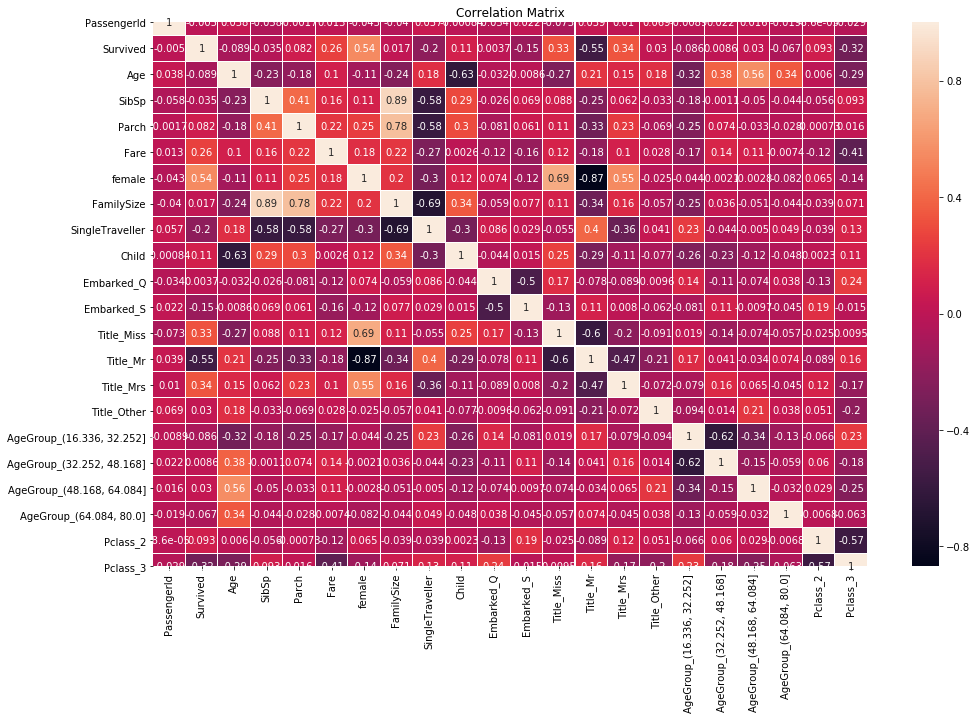

In [95]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(titanic.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,
            linecolor="white",
            ax=ax);
ax.set_title("Correlation Matrix");

Correlated features:
- `Title_Mr` & `female`

In [98]:
# Drop Title_Mr
train_X1 = train_X.copy()
train_X1 = train_X1.drop(columns="Title_Mr")

In [99]:
evaluate_models(models, train_X1)

Model: Logistic Regression

    Balanced Mean Accuracy Score: 0.7840017042884394
    Standard Deviation: 0.05066987117460882
-----------------
Model: Decision Tree

    Balanced Mean Accuracy Score: 0.7768036261524438
    Standard Deviation: 0.03727175242213882
-----------------
Model: Random Forest

    Balanced Mean Accuracy Score: 0.8181577920251977
    Standard Deviation: 0.03735888561081098
-----------------


### 7.1 Recursive Feature Elimination - RFE

Using random forest

In [100]:
from sklearn.feature_selection import RFECV

In [104]:
selector_rf = RFECV(models["Random Forest"],
                    cv=5,
                    scoring="balanced_accuracy")

In [105]:
selector_rf.fit(train_X, train_y)

RFECV(cv=5,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='balanced_accuracy',
      step=1, verbose=0)

In [107]:
selector_rf.get_support()

array([ True, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True])

this is a boolean map of the columns in your X

In [108]:
train_X.columns

Index(['SibSp', 'Parch', 'Fare', 'FamilySize', 'Age', 'female',
       'SingleTraveller', 'Child', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'AgeGroup_(16.336, 32.252]',
       'AgeGroup_(32.252, 48.168]', 'AgeGroup_(48.168, 64.084]',
       'AgeGroup_(64.084, 80.0]', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [110]:
train_X2 = train_X[train_X.columns[selector_rf.get_support()]]

In [112]:
evaluate_models(models, train_X2)

Model: Logistic Regression

    Balanced Mean Accuracy Score: 0.8015703762417965
    Standard Deviation: 0.056676107404145915
-----------------
Model: Decision Tree

    Balanced Mean Accuracy Score: 0.7947464700463887
    Standard Deviation: 0.02781162055520842
-----------------
Model: Random Forest

    Balanced Mean Accuracy Score: 0.8243526184280565
    Standard Deviation: 0.03442367342487602
-----------------


## 8. Hyperparameter Tuning

In [113]:
models

{'Logistic Regression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'Decision Tree': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=508, splitter='best'),
 'Random Forest': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        m

In [114]:
models_1 = models.copy()
models_1["Random Forest"] = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [115]:
selector_rf_1 = RFECV(models_1["Random Forest"],
                      cv=5,
                      scoring="balanced_accuracy")
selector_rf_1.fit(train_X, train_y)
train_X3 = train_X[train_X.columns[selector_rf_1.get_support()]]

In [116]:
train_X3

,SibSp,Fare,FamilySize,Age,female,Title_Miss,Title_Mr,Pclass_3
80,0,9.0000,1,22.000000,0,0,1,1
419,0,24.1500,3,10.000000,1,1,0,1
567,0,21.0750,5,29.000000,1,0,0,1
507,0,26.5500,1,29.086998,0,0,1,0
816,0,7.9250,1,23.000000,1,1,0,1
...,...,...,...,...,...,...,...,...
579,0,7.9250,1,32.000000,0,0,1,1
502,0,7.6292,1,28.030425,1,1,0,1
537,0,106.4250,1,30.000000,1,1,0,0
196,0,7.7500,1,30.450712,0,0,1,1


In [117]:
evaluate_models(models_1, train_X3)

Model: Logistic Regression

    Balanced Mean Accuracy Score: 0.8015703762417965
    Standard Deviation: 0.05593948922775385
-----------------
Model: Decision Tree

    Balanced Mean Accuracy Score: 0.7854946949242129
    Standard Deviation: 0.028338000788842476
-----------------
Model: Random Forest

    Balanced Mean Accuracy Score: 0.8301446786581931
    Standard Deviation: 0.02565535070652113
-----------------


Using GridSearch for DecisionTrees

In [119]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid_dt = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "min_samples_leaf": [1,3,5,10,None],
                 "max_depth": [2,4,6]}

In [123]:
tune_dt = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid_dt,
                       cv=5,
                       scoring="balanced_accuracy")

In [126]:
tune_dt.fit(train_X2, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [127]:
tune_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [128]:
validate_model(DecisionTreeClassifier(**tune_dt.best_params_), train_X2)


    Balanced Mean Accuracy Score: 0.8336976507267695
    Standard Deviation: 0.036894374327584585


Using Random Forest

In [129]:
param_grid_rf = {"bootstrap": [True, False],
                 "max_depth": [1,3,10],
                 "min_samples_leaf": [1,4,5],
                 "n_estimators": [10,30,50]}

tune_rf = GridSearchCV(RandomForestClassifier(),
                       param_grid=param_grid_rf,
                       cv=3,
                       scoring="balanced_accuracy",
                       n_jobs=-1)

tune_rf.fit(train_X2, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [132]:
params_rf = tune_rf.best_params_

In [135]:
params_rf["n_estimators"] = 1000

In [140]:
validate_model(RandomForestClassifier(**params_rf), train_X2)


    Balanced Mean Accuracy Score: 0.8408915169464114
    Standard Deviation: 0.03351397945633539


## 9. Final validation on test set

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
dt_model = DecisionTreeClassifier(**tune_dt.best_params_)
dt_model.fit(train_X2, train_y)

test_X2 = test_X[test_X.columns[selector_rf.get_support()]]
dt_pred = dt_model.predict(test_X2)

balanced_accuracy_score(test_y, dt_pred)

0.7655327191117411

In [139]:
confusion_matrix(test_y, dt_pred)

array([[75,  8],
       [19, 32]])

In [143]:
rf_model = RandomForestClassifier(**params_rf)
rf_model.fit(train_X3, train_y)

test_X3 = test_X[test_X.columns[selector_rf_1.get_support()]]
rf_pred = rf_model.predict(test_X3)

balanced_accuracy_score(test_y, rf_pred)

0.7813607370659107